<a href="https://colab.research.google.com/github/zainmorshed/Spotify-Top-Hits-Analysis/blob/main/ZAINMORSHED_Spotify_Top_Hits_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn import datasets, model_selection, metrics

In [ ]:
#Loading Dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


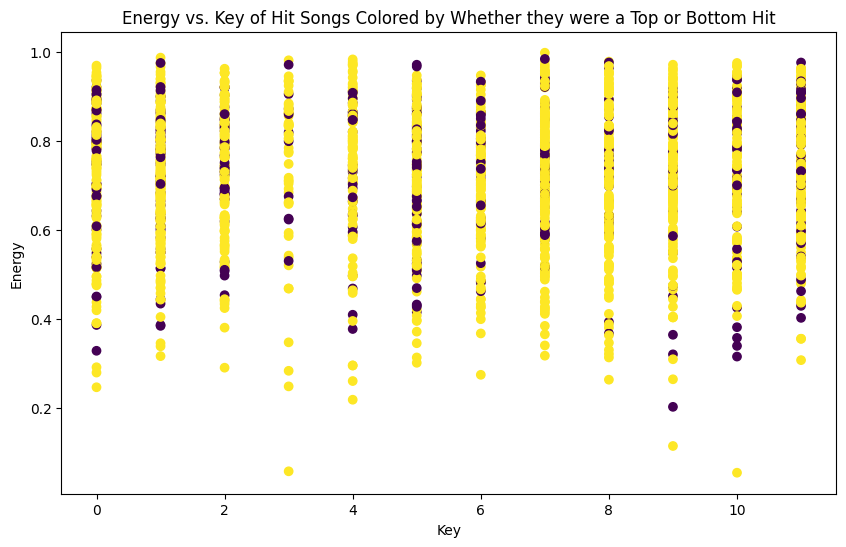

In [ ]:
#Setting independent and dependent variables

features = spotify_df[['key', 'energy']]
label = spotify_df["top half"]

plt.figure(figsize=(10,6))
plt.scatter(features['key'], features['energy'], c = label)

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

In [ ]:
#Splitting data into training and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:
#import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

SyntaxError: ignored

In [ ]:
#Initialize the model and set hyperparameters
model = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
#Lets fit the model and make a prediction
# fit
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

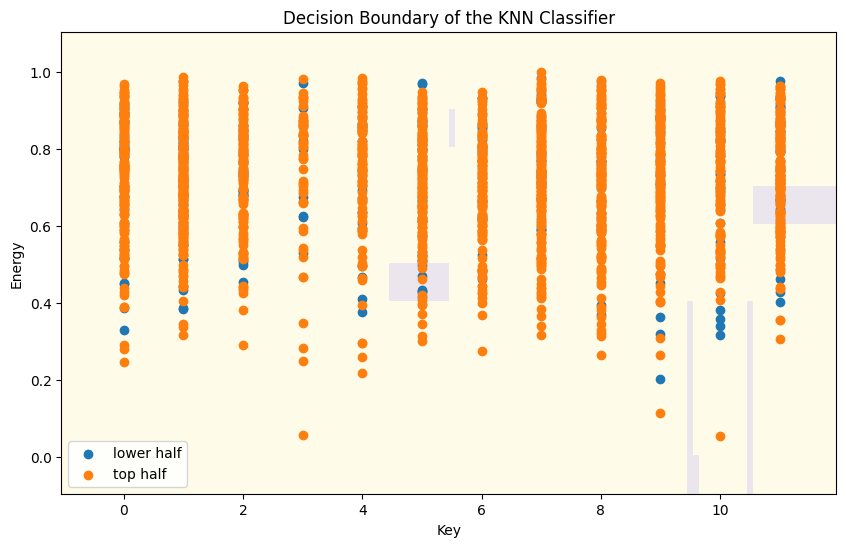

In [ ]:
# Making a scatter plot on the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(spotify_df['key'].min() - 1, spotify_df['key'].max() + 1, 0.1),
                     np.arange(spotify_df['energy'].min() - 0.1, spotify_df['energy'].max() + 0.1, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in spotify_df.groupby('top half'):
  ax.scatter(data["key"], data["energy"], label=['lower half', 'top half'][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Key")
ax.set_ylabel("Energy")
ax.legend()
plt.show()

In [ ]:
#Lets evaluate the model
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.7925


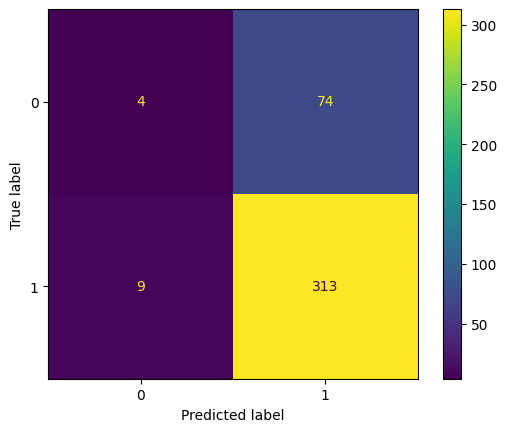

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
#Now we will use the model to make some predicitons

#Lets try a song with a key of 3 and an energy of 0.8 will be in the top half of hits
song = pd.DataFrame([[3, 0.8]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

#Lets try a song with a key of 4.5 and an energy of 0.45 will be a bust
song = pd.DataFrame([[4.5, 0.45]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

#Lets try a song with a key of 1 and an energy of 0.5 will be a hit
song = pd.DataFrame([[1, 0.5]], columns = ["key", "energy"])

prediction = model.predict(song)

print(prediction)

[1]
[0]
[1]


{1: 69.5, 3: 71.75, 5: 75.0, 7: 77.25, 9: 79.25, 11: 80.25, 13: 80.25, 15: 80.5, 17: 80.5, 19: 80.5, 21: 80.5, 23: 80.5, 25: 80.5, 27: 80.5, 29: 80.5, 31: 80.5, 33: 80.5, 35: 80.5, 37: 80.5, 39: 80.5, 41: 80.5, 43: 80.5, 45: 80.5, 47: 80.5, 49: 80.5}


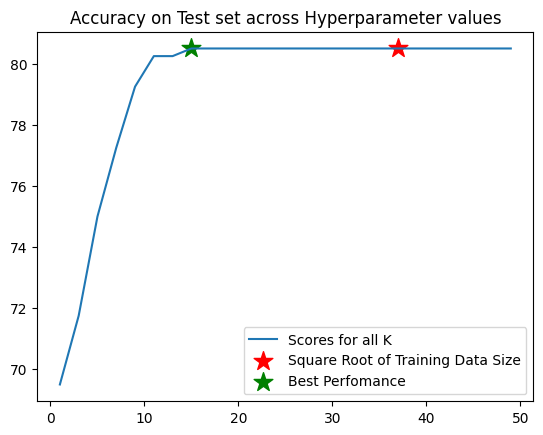

Top score of optimal classifier: 80.5
Best Value of N to use 15


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))